<ipython-input-1-6787caddd690>:86: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw_idle()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


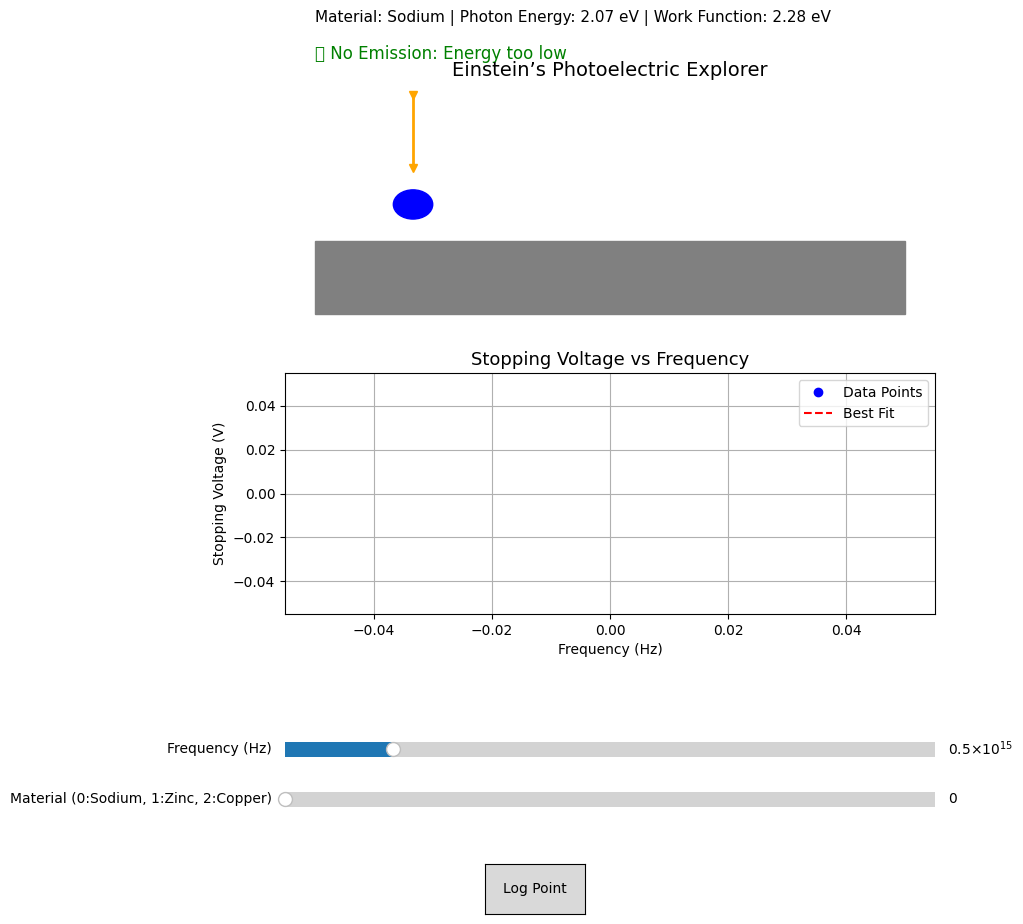

In [1]:
#Topic : Photoelectric Effect Simulator — Planck's Constant Estimator

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import matplotlib.patches as patches

# Constants
e = 1.602e-19
h_actual = 6.626e-34

# Material work functions in eV
materials = {
    'Sodium': 2.28,
    'Zinc': 4.3,
    'Copper': 4.7
}

# Convert eV to J
def eV_to_J(ev):
    return ev * e

# Track logged points
frequencies_logged = []
voltages_logged = []

# Initial plot setup
fig, (ax_sim, ax_graph) = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(left=0.25, bottom=0.35)

# SIMULATION (Top Plot)
ax_sim.axis('off')
ax_sim.set_title("Einstein’s Photoelectric Explorer", fontsize=14)

metal = patches.Rectangle((2, 1), 6, 1, color='gray')
ax_sim.add_patch(metal)
electron = plt.Circle((3, 2.5), 0.2, color='blue')
ax_sim.add_patch(electron)
photon_arrow, = ax_sim.plot([3, 3], [4, 3], color='orange', lw=2, marker='v')
info_text = ax_sim.text(2, 5, '', fontsize=11, color='black')
result_text = ax_sim.text(2, 4.5, '', fontsize=12, color='green')
quote_text = ax_sim.text(2, 0.3, '', fontsize=10, color='purple')

# GRAPH (Bottom Plot)
ax_graph.set_title("Stopping Voltage vs Frequency", fontsize=13)
ax_graph.set_xlabel("Frequency (Hz)")
ax_graph.set_ylabel("Stopping Voltage (V)")
data_plot, = ax_graph.plot([], [], 'bo', label="Data Points")
fit_line, = ax_graph.plot([], [], 'r--', label="Best Fit")
fit_text = ax_graph.text(0.5, 0.9, '', transform=ax_graph.transAxes, fontsize=10, color='darkgreen')
ax_graph.grid(True)
ax_graph.legend()

# SLIDERS
ax_freq = plt.axes([0.25, 0.2, 0.65, 0.03])
ax_material = plt.axes([0.25, 0.15, 0.65, 0.03])
freq_slider = Slider(ax_freq, 'Frequency (Hz)', 4e14, 1e15, valinit=5e14, valstep=1e13)
material_slider = Slider(ax_material, 'Material (0:Sodium, 1:Zinc, 2:Copper)', 0, 2, valinit=0, valstep=1)

# BUTTON
ax_button = plt.axes([0.45, 0.05, 0.1, 0.05])
save_button = Button(ax_button, 'Log Point')

# Update display
def update(val):
    freq = freq_slider.val
    mat_index = int(material_slider.val)
    material = list(materials.keys())[mat_index]
    work_func = eV_to_J(materials[material])
    energy = h_actual * freq
    kinetic = energy - work_func

    info_text.set_text(f"Material: {material} | Photon Energy: {energy/e:.2f} eV | Work Function: {materials[material]} eV")

    if kinetic > 0:
        V_stop = kinetic / e
        electron.set_center((6, 4))
        electron.set_color('green')
        result_text.set_text(f"✅ Electron Ejected! K.E. = {kinetic/e:.2f} eV")
        quote_text.set_text("“God does not play dice with the universe.” – Einstein")
    else:
        V_stop = 0
        electron.set_center((3, 2.5))
        electron.set_color('blue')
        result_text.set_text("❌ No Emission: Energy too low")
        quote_text.set_text("")

    fig.canvas.draw_idle()
    return freq, V_stop

# Log point on click
def log_point(event):
    freq, V_stop = update(None)
    if V_stop > 0:
        frequencies_logged.append(freq)
        voltages_logged.append(V_stop)

        data_plot.set_data(frequencies_logged, voltages_logged)
        ax_graph.relim()
        ax_graph.autoscale_view()

        if len(frequencies_logged) >= 2:
            slope, intercept = np.polyfit(frequencies_logged, voltages_logged, 1)
            fit_freqs = np.linspace(min(frequencies_logged), max(frequencies_logged), 100)
            fit_volts = slope * fit_freqs + intercept
            fit_line.set_data(fit_freqs, fit_volts)

            h_calc = slope * e
            error = abs((h_calc - h_actual) / h_actual) * 100
            fit_text.set_text(f"Calculated h = {h_calc:.3e} J·s\nError: {error:.2f}%")

    fig.canvas.draw_idle()

# Connect events
freq_slider.on_changed(update)
material_slider.on_changed(update)
save_button.on_clicked(log_point)

# Initial update
update(None)
plt.show()